In [108]:
# -----------------------------------------------------------
# Dissertation Project: An Empirical Study on the Classification 
# Performance of Deep Learning vs. Gradient Boosting 
# on heterogeneous tabular data
#
# This module shows the class imbalance for Lending Club
#
# Author: Adam Mabrouk
# Supervisor: Ben Ralph
# Institution: University of Bath
# Created on: 01/01/2024
# Version: 1.0
# -----------------------------------------------------------

# Pandas version: 2.0.3
# Python version: 3.11.5

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

lending_club = pd.read_csv('01_LendingClubData_2007_to_2018Q4.csv')

/var/folders/mx/qv4d3flx7h75mxf7czzm48180000gp/T/ipykernel_76867/2997002197.py:5: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  lending_club = pd.read_csv('01_LendingClubData_2007_to_2018Q4.csv')


In [130]:
import pandas as pd

label_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'Default': 0
}

lending_club['loan_status_mapped'] = lending_club['loan_status'].map(label_mapping)

class_counts = lending_club['loan_status_mapped'].value_counts(normalize=True)  

print("Frequency of each class in the mapped 'loan_status':")
print(class_counts)

majority_class_freq = max(class_counts)
minority_class_freq = min(class_counts)
imbalance_ratio = majority_class_freq / minority_class_freq
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1 (Majority:Minority)")

Frequency of each class in the mapped 'loan_status':
loan_status_mapped
1.0    0.78778
0.0    0.21222
Name: proportion, dtype: float64

Imbalance Ratio: 3.71:1 (Majority:Minority)


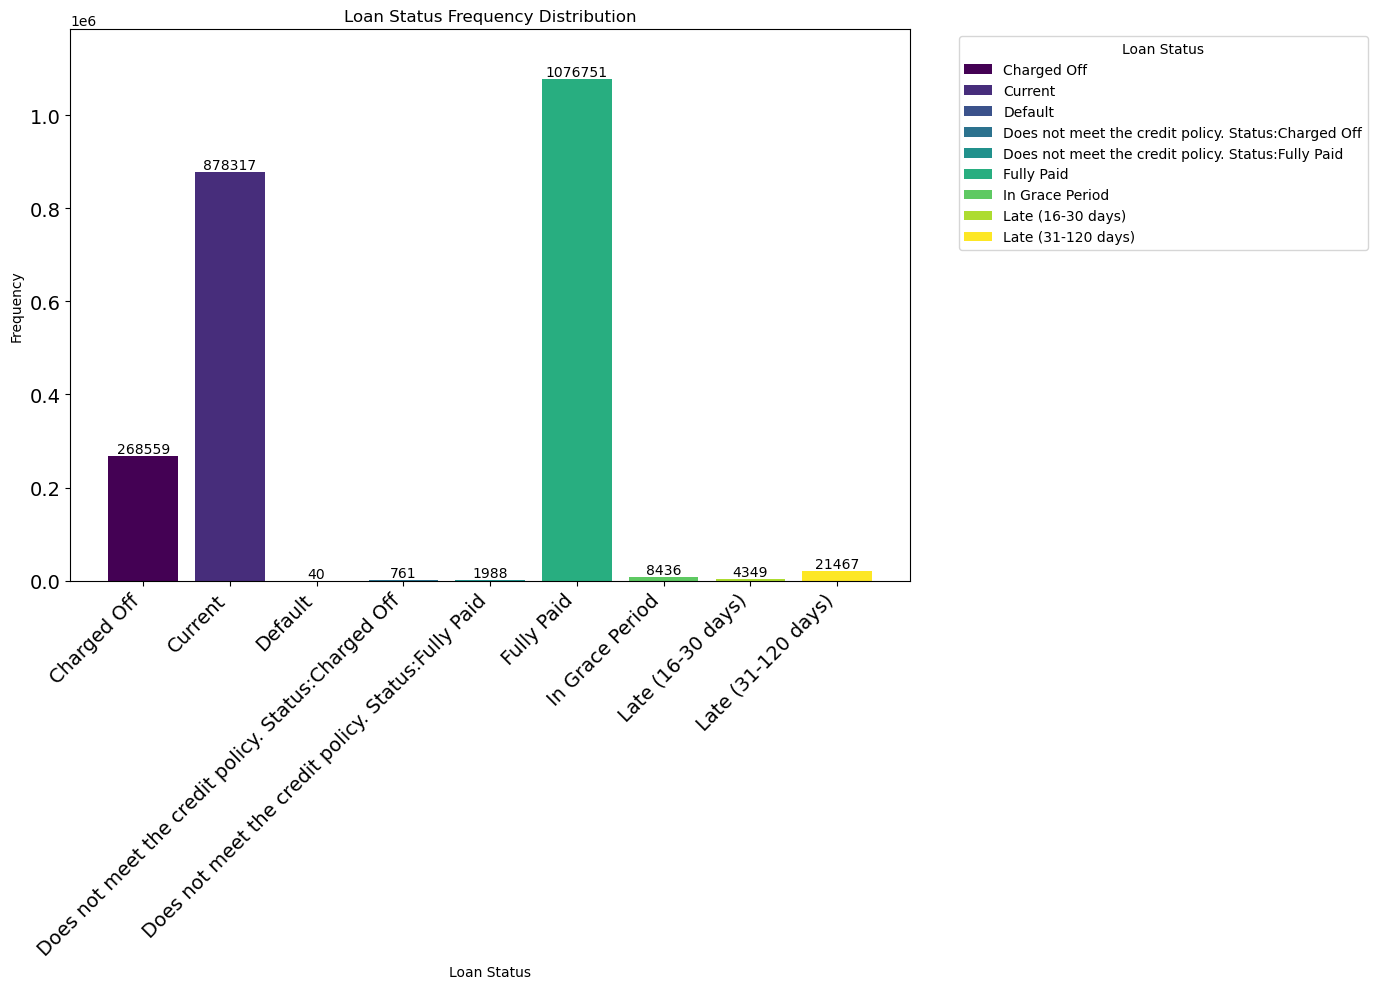

In [148]:
loan_status_counts = loan_status_counts.sort_index()

colors = plt.cm.viridis(np.linspace(0, 1, len(loan_status_counts)))
plt.figure(figsize=(14, 10))  
plt.xticks(rotation=45, ha="right", fontsize=14)  
plt.yticks(fontsize=14)  

bars = plt.bar(loan_status_counts.index, loan_status_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.legend(bars, loan_status_counts.index, title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status Frequency Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  

plt.ylim(0, loan_status_counts.values.max() * 1.1)  

plt.tight_layout()  
plt.show()

In [110]:
lending_club_cleaned = pd.read_csv('lending_club_feature_engineered.csv')

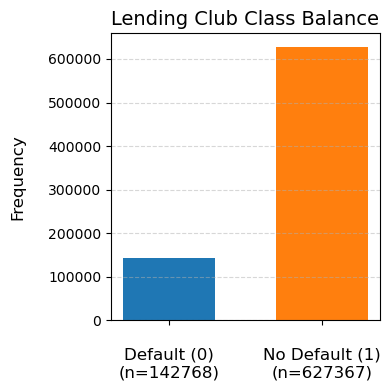

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loan_status_counts = lending_club_cleaned['loan_status'].value_counts()
plt.figure(figsize=(4, 4))  
bar_width = 0.6

colors = ['#1f77b4', '#ff7f0e']
new_labels = ['\nDefault (0)\n(n={})'.format(loan_status_counts.get(0, 0)),
              '\nNo Default (1)\n(n={})'.format(loan_status_counts.get(1, 0))]
counts = [loan_status_counts.get(0, 0), loan_status_counts.get(1, 0)]
bars = plt.bar(range(len(counts)), counts, color=colors[:len(counts)], width=bar_width)

plt.xticks(range(len(new_labels)), new_labels, rotation=0, ha="center", fontsize=12)

plt.ylabel('Frequency\n', fontsize=12)
plt.title('Lending Club Class Balance', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()